In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('clean_dataset.csv')
df.head()

,"How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?",For what task do you mostly use AI?,How confident are you in understanding how AI tools work?,How willing are you to adopt new AI tools in the future?,How much time do you think AI saves you daily?,How useful do you find AI in improving your learning or productivity?,Do you feel comfortable relying on AI-generated recommendations?,How often do you rely on AI when you get stuck instead of thinking on your own first?,"If AI tools were unavailable for a day, how difficult would your work/studies become?",Do you feel dependent on AI for completing academic tasks?,How frequently do you double-check AI-generated answers?,How much do you trust the accuracy of AI-generated content?,Do you believe AI may reduce your problem-solving or critical-thinking skills over time?
0,Rarely,Coding,4,5,2 hours,4,Sometimes,Always,5,To some extent,Often,3,Yes
1,Never,"Creative tasks (stories, ideas, designs)",3,5,> 2 hours,4,No,Never,4,Yes,Always,4,Yes
2,Daily,Summarizing content,4,4,1 hours,4,No,Always,1,Yes,Sometimes,3,Maybe
3,Never,Summarizing content,4,4,> 2 hours,3,Yes,Never,5,Yes,Never,3,Maybe
4,Sometimes,Assignments,4,5,2 hours,2,Yes,Always,4,No,Never,3,Yes


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?                           1000 non-null   object
 1   For what task do you mostly use AI?                                                       1000 non-null   object
 2   How confident are you in understanding how AI tools work?                                 1000 non-null   int64 
 3   How willing are you to adopt new AI tools in the future?                                  1000 non-null   int64 
 4   How much time do you think AI saves you daily?                                            1000 non-null   object
 5   How useful do you find AI in improving your learning or product

How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?                             0
For what task do you mostly use AI?                                                         0
How confident are you in understanding how AI tools work?                                   0
How willing are you to adopt new AI tools in the future?                                    0
How much time do you think AI saves you daily?                                              0
How useful do you find AI in improving your learning or productivity?                       0
Do you feel comfortable relying on AI-generated recommendations?                            0
How often do you rely on AI when you get stuck instead of thinking on your own first?       0
If AI tools were unavailable for a day, how difficult would your work/studies become?       0
Do you feel dependent on AI for completing academic tasks?                                  0
How frequently do you double-check AI-generated answers?    

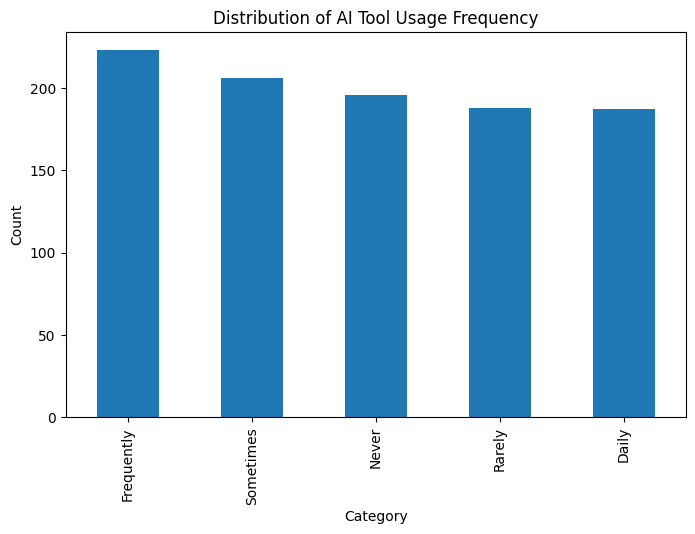

In [3]:
plt.figure(figsize=(8,5))
df['How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?'].value_counts().plot(kind='bar')
plt.title("Distribution of AI Tool Usage Frequency")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

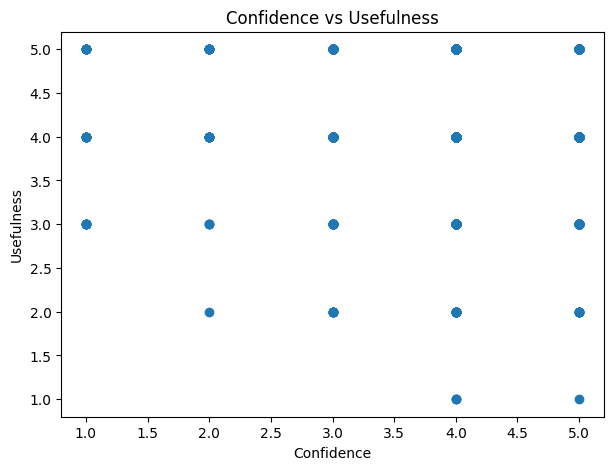

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(df['How confident are you in understanding how AI tools work?'],
            df['How useful do you find AI in improving your learning or productivity?'])
plt.title("Confidence vs Usefulness")
plt.xlabel("Confidence")
plt.ylabel("Usefulness")
plt.show()

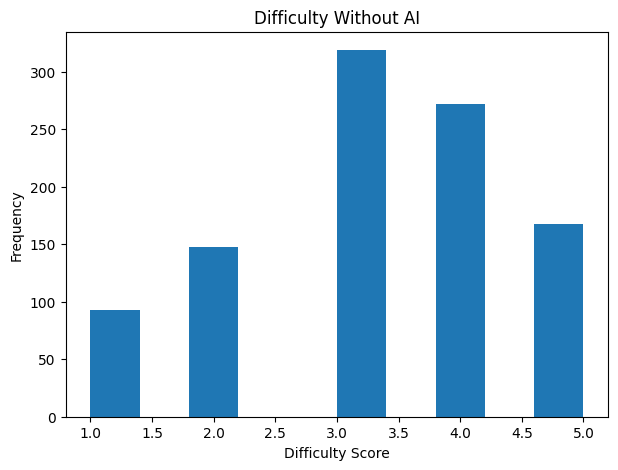

In [5]:
plt.figure(figsize=(7,5))
plt.hist(df['If AI tools were unavailable for a day, how difficult would your work/studies become?'])
plt.title("Difficulty Without AI")
plt.xlabel("Difficulty Score")
plt.ylabel("Frequency")
plt.show()

In [6]:
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,How confident are you in understanding how AI tools work?,How willing are you to adopt new AI tools in the future?,How useful do you find AI in improving your learning or productivity?,"If AI tools were unavailable for a day, how difficult would your work/studies become?",How much do you trust the accuracy of AI-generated content?,"How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?_Frequently","How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?_Never","How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?_Rarely","How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?_Sometimes",For what task do you mostly use AI?_Coding,...,How often do you rely on AI when you get stuck instead of thinking on your own first?_Rarely,How often do you rely on AI when you get stuck instead of thinking on your own first?_Sometimes,Do you feel dependent on AI for completing academic tasks?_To some extent,Do you feel dependent on AI for completing academic tasks?_Yes,How frequently do you double-check AI-generated answers?_Never,How frequently do you double-check AI-generated answers?_Often,How frequently do you double-check AI-generated answers?_Rarely,How frequently do you double-check AI-generated answers?_Sometimes,Do you believe AI may reduce your problem-solving or critical-thinking skills over time?_No,Do you believe AI may reduce your problem-solving or critical-thinking skills over time?_Yes
0,4,5,4,5,3,False,False,True,False,True,...,False,False,True,False,False,True,False,False,False,True
1,3,5,4,4,4,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,4,4,4,1,3,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,4,4,3,5,3,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,4,5,2,4,3,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [7]:
# Creating a dependency score from key columns
df_encoded['AI_Dependency_Score'] = (
    df['How often do you rely on AI when you get stuck instead of thinking on your own first?'].astype('category').cat.codes +
    df['Do you feel dependent on AI for completing academic tasks?'].astype('category').cat.codes +
    df['If AI tools were unavailable for a day, how difficult would your work/studies become?']
)

df_encoded['AI_Dependency_Score'] = df_encoded['AI_Dependency_Score'].astype(int)

df_encoded['AI_Dependency_Level'] = pd.cut(
    df_encoded['AI_Dependency_Score'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)

df_encoded['AI_Dependency_Level'] = df_encoded['AI_Dependency_Level'].astype('category')

df_encoded.head()

,How confident are you in understanding how AI tools work?,How willing are you to adopt new AI tools in the future?,How useful do you find AI in improving your learning or productivity?,"If AI tools were unavailable for a day, how difficult would your work/studies become?",How much do you trust the accuracy of AI-generated content?,"How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?_Frequently","How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?_Never","How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?_Rarely","How often do you use AI tools (ChatGPT, Gemini, Copilot, etc.)?_Sometimes",For what task do you mostly use AI?_Coding,...,Do you feel dependent on AI for completing academic tasks?_To some extent,Do you feel dependent on AI for completing academic tasks?_Yes,How frequently do you double-check AI-generated answers?_Never,How frequently do you double-check AI-generated answers?_Often,How frequently do you double-check AI-generated answers?_Rarely,How frequently do you double-check AI-generated answers?_Sometimes,Do you believe AI may reduce your problem-solving or critical-thinking skills over time?_No,Do you believe AI may reduce your problem-solving or critical-thinking skills over time?_Yes,AI_Dependency_Score,AI_Dependency_Level
0,4,5,4,5,3,False,False,True,False,True,...,True,False,False,True,False,False,False,True,6,Medium
1,3,5,4,4,4,False,True,False,False,False,...,False,True,False,False,False,False,False,True,7,Medium
2,4,4,4,1,3,False,False,False,False,False,...,False,True,False,False,False,True,False,False,3,Low
3,4,4,3,5,3,False,True,False,False,False,...,False,True,True,False,False,False,False,False,8,High
4,4,5,2,4,3,False,False,False,True,False,...,False,False,True,False,False,False,False,True,4,Low


In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['AI_Dependency_Level'])
y = df_encoded['AI_Dependency_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((700, 33), (300, 33))

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = accuracy_score(y_test, preds)

results

NameError: name 'X_train' is not defined

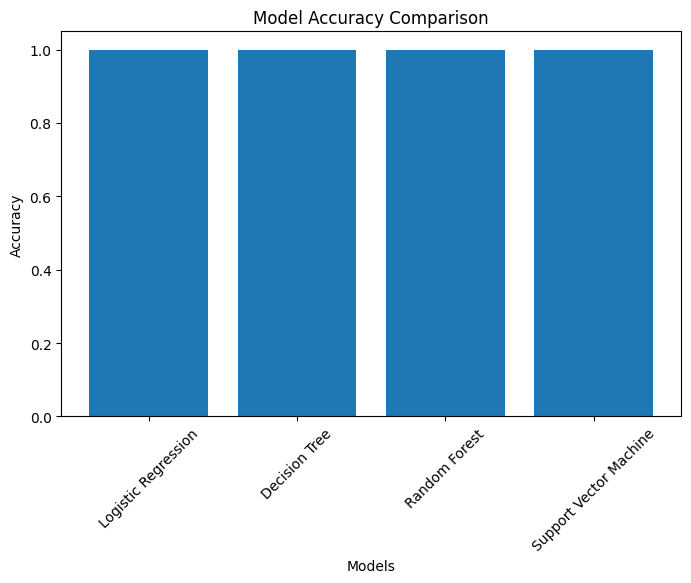

In [10]:
plt.figure(figsize=(8,5))
plt.bar(list(results.keys()), list(results.values()))
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

In [2]:
best_model = max(results, key=results.get)
best_model

NameError: name 'results' is not defined